# Latex export of plots
This notebook was used for creating **Figure 4** in the paper. If you run this notebook in the supplied docker container, do not run the cells `[2]` and `[6]` which require $\LaTeX$ and [tikzmagic](https://github.com/xblahoud/tikzmagic) installed in the system. We did not supply them to keep the size of the docker container reasonably small.

In [1]:
from ltlcross_wrapper import ResAnalyzer

In [2]:
import tikzmagic

def display_tikz(tikzcode, scale=1):
    preamble = r"""\usepackage{pgfplots}
\usepackage{xcolor}
"""
    return tikzmagic.tikzmagic.tikz(f"-s={scale} -b=0 -x='{preamble}'", tikzcode)

In [3]:
b = ResAnalyzer(f"data/random_nd.csv", cols=["states","time","acc","transitions"])
b.compute_best(["yes.owl#s","yes.owl#a"],"yes.owl#best")
names = {
    "yes.owl#best" : "Owl+best+Spot",
    "yes.seminator#def" : "Seminator 2"
}

b.values.rename(columns=names, level=1, inplace=True)
b.tools = [names.get(t,t) for t in b.tools]
b.mins = [names.get(t,t) for t in b.mins]
b.tool_set = [names.get(t,t) for t in b.tool_set]
b.exit_status.rename(columns=names, level=0, inplace=True)

t1, t2 = "Owl+best+Spot","Seminator 2"
above = len(b.smaller_than(t1, t2))
below = len(b.smaller_than(t2, t1))
nodes = f"""%
\\draw[gray] (0,0) -- 
  node[above, sloped, magenta, pos=.85, font=\\tiny, align=center] {{{t1}\\\\better in\\\\{above} cases}}
  node[below, sloped, magenta, pos=.85, font=\\tiny, align=center,] {{{t2}\\\\better in\\\\{below} cases}}
(40,40);
"""

In [4]:
args = {
    "width" : "5.5cm",
    "height" : "4.8cm",
    "xlabel shift" : "-.1cm"
}
labels = {
    "xlabel" : f"{{{t1} [\\#states]}}",
    "ylabel" : f"{{{t2} [\\#states]}}"
}

In [5]:
tikzcode = b.pgfplots_scatter_plot(t1, t2, include_equal=True, marks_dict={"fill" : "cyan", "fill opacity" : .3}, **labels, tikz_hook=nodes, diagonal=False, **args)
!mkdir -p ../fig
print(tikzcode, file=open("../fig/owl_sem_nd.tikz", "w"))

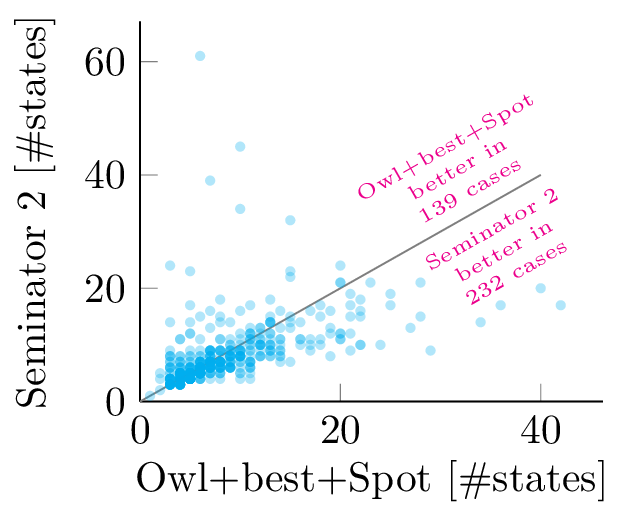

In [6]:
display_tikz(tikzcode)